In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import nltk

In [2]:
df = pd.read_csv('spam.csv',encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#checking shape of data
df.shape

(5572, 5)

In [4]:
#Checking column names and null values 
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
#removing unwanted columns 
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#changing their column names for better understanding
df = df.rename(columns={'v1':'target','v2':'text'})
df.columns

Index(['target', 'text'], dtype='object')

## EDA

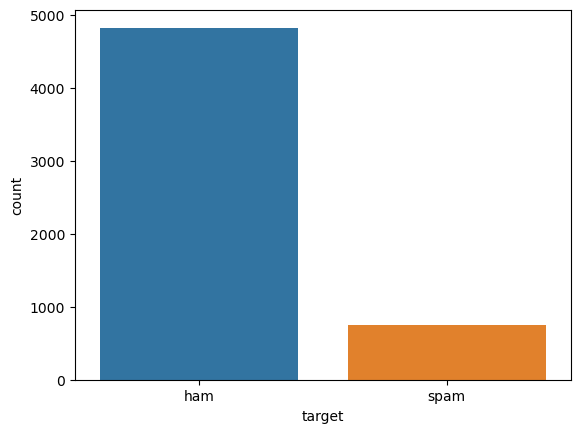

In [7]:
sns.countplot(x = df['target'])
plt.show()

In [8]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

<Axes: ylabel='target'>

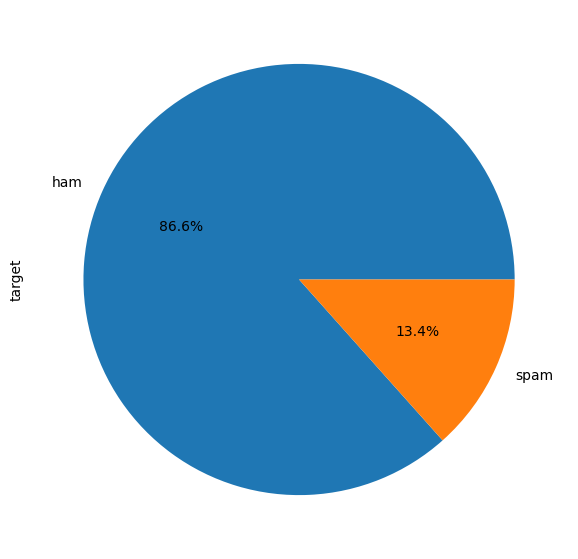

In [9]:
plt.figure(figsize = (7,7))
df['target'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

## Preprocessing

In [10]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer , WordNetLemmatizer
from sklearn.model_selection import train_test_split
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pcrid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcrid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
Stemming = PorterStemmer()
Lemmatized = WordNetLemmatizer()

In [12]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
import re
cleaned_data = []
for i in range (len(df)):
    result = re.sub('[^a-zA-Z0-9]', ' ', df['text'][i])
    result = result.lower()
    result = result.split()
    result = [Lemmatized.lemmatize(word) for word in result if not word in stopwords.words('english')]
    result = ' '.join(result)
    cleaned_data.append(result)

In [14]:
cleaned_data[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [15]:
df['Cleaned_data'] = cleaned_data
df.head(4)

,target,text,Cleaned_data
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say


In [16]:
df = df.drop(['text'],axis = 1)
df.sample(5)

,target,Cleaned_data
1640,ham,alright set text man
2328,ham,day asked anand number
2804,ham,think still car
3102,ham,u lousy run already come back half dead hee
905,ham,hey charles sorry late reply


In [17]:
df['target'] = df['target'].map({'spam':1 , 'ham':0})

In [18]:
df.target.value_counts()

0    4825
1     747
Name: target, dtype: int64

In [19]:
df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [20]:
df.head()

,target,Cleaned_data
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [21]:
from sklearn.feature_extraction.text import CountVectorizer  #(TF-IDF)

In [22]:
co = CountVectorizer()

In [23]:
X = df['Cleaned_data']
y = df['target']

In [24]:
X.head(5)

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4                  nah think go usf life around though
Name: Cleaned_data, dtype: object

In [25]:
y.head(5)

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int64

In [26]:
df.sample(5)

,target,Cleaned_data
1374,1,500 new mobile 2004 must go txt nokia 89545 co...
4114,0,sorry never hear unless book one kinda joke th...
5399,0,apparently bffs carly quick
1212,0,yo game almost want go walmart soon
5325,0,gal n boy walking park gal hold ur hand boy u ...


In [27]:
X.shape

(5572,)

In [28]:
y.shape

(5572,)

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.33 , random_state = 42)

In [30]:
X_train.head()

3235    aight text back mu swing need somebody get door
945                          cant wait see photo useful
5319                            kothi print marandratha
5528                           effect irritation ignore
247                          kallis wont bat 2nd inning
Name: Cleaned_data, dtype: object

In [31]:
X_train.shape

(3733,)

In [32]:
y_train.head()

3235    0
945     0
5319    0
5528    0
247     0
Name: target, dtype: int64

In [33]:
y_train.shape

(3733,)

In [34]:
X_train = co.fit_transform(X_train)

In [35]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
X_train.shape

(3733, 6470)

In [37]:
X_test = co.transform(X_test)

In [38]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
X_test.shape

(1839, 6470)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
ml = MultinomialNB()

In [42]:
ml.fit(X_train,y_train)

MultinomialNB()

In [43]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [44]:
ml.score(X_train,y_train)

0.994374497723011

In [45]:
ml.score(X_test,y_test)

0.9793365959760739

## Balancing the data 

In [46]:
df.head()

,target,Cleaned_data
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


## Downsampling

In [47]:
from imblearn.under_sampling import NearMiss 

In [48]:
print("Labels count for ham 0 = {}".format(sum(y_train == 0)))
print("Labels count for spam 1 = {}".format(sum(y_train == 1)))

print()
print("Labels count for ham 0 = {}".format(sum(y_test == 0)))
print("Labels count for spam 1 = {}".format(sum(y_test == 1)))

undersampling = NearMiss(version = 1 , n_neighbors = 3)

X_train_res,y_train_res = undersampling.fit_resample(X_train,y_train)
X_test_res,y_test_res = undersampling.fit_resample(X_test,y_test)

print()
print("Labels count for ham 0 = {}".format(sum(y_train_res == 0)))
print("Labels count for spam 1 = {}".format(sum(y_train_res == 1)))

print()
print("Labels count for ham 0 = {}".format(sum(y_test_res == 0)))
print("Labels count for spam 1 = {}".format(sum(y_test_res == 1)))

Labels count for ham 0 = 3238
Labels count for spam 1 = 495

Labels count for ham 0 = 1587
Labels count for spam 1 = 252

Labels count for ham 0 = 495
Labels count for spam 1 = 495

Labels count for ham 0 = 252
Labels count for spam 1 = 252


In [49]:
ml.fit(X_train_res,y_train_res)

MultinomialNB()

In [50]:
ml.score(X_train_res,y_train_res)

0.9454545454545454

In [51]:
ml.score(X_test,y_test)

0.8216421968461121

In [52]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


## Upsampling

In [53]:
print("Labels count for ham 0 = {}".format(sum(y_train == 0)))
print("Labels count for spam 1 = {}".format(sum(y_train == 1)))

print()
print("Labels count for ham 0 = {}".format(sum(y_test == 0)))
print("Labels count for spam 1 = {}".format(sum(y_test == 1)))

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2 )

X_train_up,y_train_up = sm.fit_resample(X_train,y_train)
X_test_up,y_test_up = sm.fit_resample(X_test,y_test)

print()
print("Labels count for ham 0 = {}".format(sum(y_train_up == 0)))
print("Labels count for spam 1 = {}".format(sum(y_train_up == 1)))

print()
print("Labels count for ham 0 = {}".format(sum(y_test_up == 0)))
print("Labels count for spam 1 = {}".format(sum(y_test_up == 1)))


Labels count for ham 0 = 3238
Labels count for spam 1 = 495

Labels count for ham 0 = 1587
Labels count for spam 1 = 252

Labels count for ham 0 = 3238
Labels count for spam 1 = 3238

Labels count for ham 0 = 1587
Labels count for spam 1 = 1587


In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [55]:
def LR(X_train_up,y_train_up,X_test_up,y_test_up):
    lg = LogisticRegression()
    lg.fit(X_train_up,y_train_up)
    print("Train accuracy score : {}".format(lg.score(X_train_up,y_train_up)))
    print("Test accuracy score : {}".format(lg.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = lg.predict(X_train_up)
    y_test_up_pred = lg.predict(X_test_up)
    print("Train confusion matrix = /n",confusion_matrix(y_train_up,y_train_up_pred))
    print("Test confusion matrix = /n",confusion_matrix(y_test_up,y_test_up_pred))
    print()
    print('----Classification Report -------')
    print("Train = ",classification_report(y_train_up,y_train_up_pred))
    print("Test = ",classification_report(y_test_up,y_test_up_pred))

In [56]:
def NB(X_train_up,y_train_up,X_test_up,y_test_up):
    nb = MultinomialNB()
    nb.fit(X_train_up,y_train_up)
    print("Train Accuracy_score = {} ".format(nb.score(X_train_up,y_train_up)))
    print("Test Accuracy_score = {} ".format(nb.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = nb.predict(X_train_up)
    y_test_up_pred = nb.predict(X_test_up)
    print('Train confusion matrix = \n',confusion_matrix(y_train_up , y_train_up_pred))
    print('test confusion matrix = \n ',confusion_matrix(y_test_up , y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))

In [57]:
def DT(X_train_up,y_train_up,X_test_up,y_test_up):
    dt = DecisionTreeClassifier()
    dt.fit(X_train_up,y_train_up)
    print("Train Accuracy score = {}".format(dt.score(X_train_up,y_train_up)))
    print("Test Accuracy score = {}".format(dt.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = dt.predict(X_train_up)
    y_test_up_pred = dt.predict(X_test_up)
    print("Train confusion matrix = /n",confusion_matrix(y_train_up,y_train_up_pred))
    print("Test confusion matrix = /n",confusion_matrix(y_test_up,y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))
    

In [58]:
def RF(X_train_up,y_train_up,X_test_up,y_test_up):
    rf = RandomForestClassifier()
    rf.fit(X_train_up,y_train_up)
    print("Train accuracy score = {}".format(rf.score(X_train_up,y_train_up)))
    print("Test accuracy score = {}".format(rf.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = rf.predict(X_train_up)
    y_test_up_pred = rf.predict(X_test_up)
    print('Train confusion matrix = \n',confusion_matrix(y_train_up , y_train_up_pred))
    print('test confusion matrix =\n ',confusion_matrix(y_test_up , y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))

In [59]:
def svm(X_train_up,y_train_up,X_test_up,y_test_up):
    svm = SVC(C=1.0,kernel='rbf')
    svm.fit(X_train_up,y_train_up)
    print("Train Accuracy_score = {} ".format(svm.score(X_train_up,y_train_up)))
    print("Test Accuracy_score = {} ".format(svm.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = svm.predict(X_train_up)
    y_test_up_pred = svm.predict(X_test_up)
    print('Train confusion matrix = \n ',confusion_matrix(y_train_up , y_train_up_pred))
    print('test confusion matrix = \n ',confusion_matrix(y_test_up , y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))

In [60]:
def checking(X_train_up,y_train_up,X_test_up,y_test_up):
    print('*'*100)
    print('Logistic Regression')
    LR(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    print('Naive Bayes')
    NB(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    print('Decision Tree')
    DT(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    print('Random Forest')
    RF(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    print('SVM')
    svm(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)


In [61]:
checking(X_train_up,y_train_up,X_test_up,y_test_up)

****************************************************************************************************
Logistic Regression
Train accuracy score : 0.9876466954910439
Test accuracy score : 0.9464398235664776

---------- confusion matrix ------------
Train confusion matrix = /n [[3175   63]
 [  17 3221]]
Test confusion matrix = /n [[1466  121]
 [  49 1538]]

----Classification Report -------
Train =                precision    recall  f1-score   support

           0       0.99      0.98      0.99      3238
           1       0.98      0.99      0.99      3238

    accuracy                           0.99      6476
   macro avg       0.99      0.99      0.99      6476
weighted avg       0.99      0.99      0.99      6476

Test =                precision    recall  f1-score   support

           0       0.97      0.92      0.95      1587
           1       0.93      0.97      0.95      1587

    accuracy                           0.95      3174
   macro avg       0.95      0.95      0.95     

#### Since Logistic Regression gives highest Accuracy we can procees with logistic Regression 

In [62]:
lg = LogisticRegression()
lg.fit(X_train_up,y_train_up)
print("Train Accuracy_score = {} ".format(lg.score(X_train_up,y_train_up)))
print("Test Accuracy_score = {} ".format(lg.score(X_test_up,y_test_up)))
print()
print('---------- confusion matrix ------------')
y_train_up_pred = lg.predict(X_train_up)
y_test_up_pred = lg.predict(X_test_up)
print('Train confusion matrix = \n',confusion_matrix(y_train_up , y_train_up_pred))
print('test confusion matrix = \n',confusion_matrix(y_test_up , y_test_up_pred))
print()
print('----Classification Report -------')
print('Train = ',classification_report(y_train_up , y_train_up_pred))
print("Test = ",classification_report(y_test_up , y_test_up_pred))

Train Accuracy_score = 0.9876466954910439 
Test Accuracy_score = 0.9464398235664776 

---------- confusion matrix ------------
Train confusion matrix = 
 [[3175   63]
 [  17 3221]]
test confusion matrix = 
 [[1466  121]
 [  49 1538]]

----Classification Report -------
Train =                precision    recall  f1-score   support

           0       0.99      0.98      0.99      3238
           1       0.98      0.99      0.99      3238

    accuracy                           0.99      6476
   macro avg       0.99      0.99      0.99      6476
weighted avg       0.99      0.99      0.99      6476

Test =                precision    recall  f1-score   support

           0       0.97      0.92      0.95      1587
           1       0.93      0.97      0.95      1587

    accuracy                           0.95      3174
   macro avg       0.95      0.95      0.95      3174
weighted avg       0.95      0.95      0.95      3174



### AUC and ROC 

In [63]:
from sklearn.metrics import roc_auc_score,roc_curve

In [64]:
y_test_auc = lg.predict_proba(X_test_up)[: , 1]

In [65]:
y_test_auc

array([8.41035185e-02, 3.49069570e-04, 8.34161614e-01, ...,
       9.97190110e-01, 6.37185697e-01, 9.98401777e-01])

In [66]:
fpr , tpr , threshold = roc_curve(y_test_up,y_test_auc)

In [67]:
print("FPR = \n\n",fpr)
print('-'*100)
print('TPR = \n\n',tpr)

FPR = 

 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00

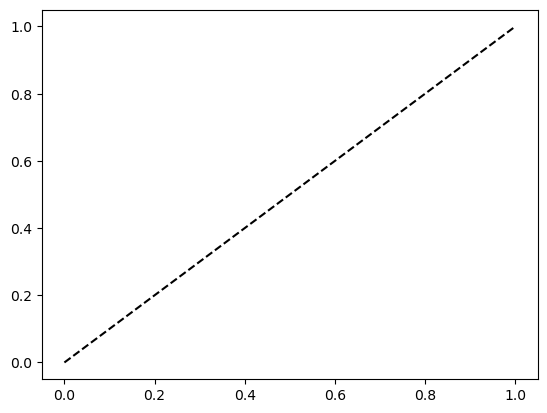

In [68]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')

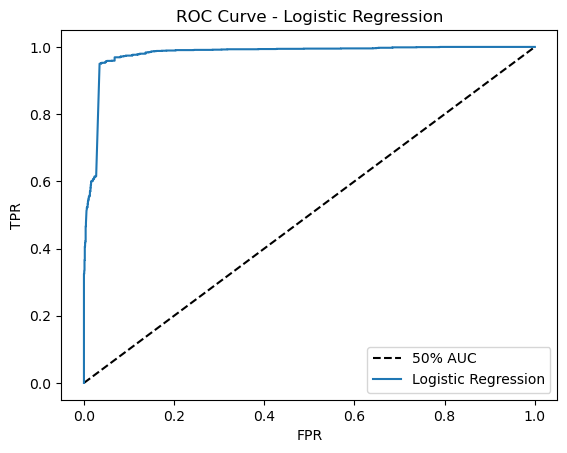

In [69]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc = 0)
plt.show()

In [70]:
roc_auc_score(y_test_up,y_test_auc)

0.9789608702402038

In [71]:
a = ['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']
a = co.transform(a)
a = a.toarray()

In [72]:
lg.predict(a)

array([1], dtype=int64)

### Testing Real data 

In [73]:
b = ['dear candidate  we are hiring 2018 batch b tech students and glad to share this exciting opportunity with you about the company   we shape the future of scholarly and medical communications using innovative editing solutions and cutting edge technology  with services that provide top notch english editing and medical writing solutions  cactus is committed to meeting the unique communication needs of the scholarly publishing and pharmaceutical industries  profile  associate editor physical sciences   engineering  office or telecommute 2  openings  eligible course   streams   b e b tech  any specialization 4  job location pune  bangalore5  salary   4 6lpawe look forward to your application to take the process ahead regards hr teamcactus communications pvt  ltd ']
b = co.transform(b)
b = b.toarray()

In [74]:
lg.predict(b)

array([0], dtype=int64)

In [75]:
data = ["Hi Prashant, Your updated Credit Score for Jan'24 is here, check now to see whether it has increased or decreased. Did you know? Keeping yourself updated about your Credit Score is a good financial habit."]

In [76]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcrid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
#removing punctauations and unwanted stuff

result_list = [re.sub('[^a-zA-Z0-9]', ' ', sentence) for sentence in data]

# Process each modified sentence independently
for result in result_list:
    print(result)


Hi Prashant  Your updated Credit Score for Jan 24 is here  check now to see whether it has increased or decreased  Did you know  Keeping yourself updated about your Credit Score is a good financial habit 


In [78]:
#lowering the text 

result = result.lower()
print(result)

hi prashant  your updated credit score for jan 24 is here  check now to see whether it has increased or decreased  did you know  keeping yourself updated about your credit score is a good financial habit 


In [79]:
# removing stopwords 

cleaned_text = []
for i in result.split():
    if i not in stopwords.words('english'):
        cleaned_text.append(i)
        
final_data = ' '.join(cleaned_text)
print(final_data)

hi prashant updated credit score jan 24 check see whether increased decreased know keeping updated credit score good financial habit


In [80]:
lemma = WordNetLemmatizer()

In [81]:
lemma_text = []
for i in final_data.split():
    lemma_text.append(lemma.lemmatize(i))
    
lemma_text = ' '.join(lemma_text)
print(lemma_text)
    


hi prashant updated credit score jan 24 check see whether increased decreased know keeping updated credit score good financial habit


In [82]:
lemma_text

'hi prashant updated credit score jan 24 check see whether increased decreased know keeping updated credit score good financial habit'

In [83]:
type(lemma_text)

str

In [84]:
final_text = [lemma_text]

In [85]:
type(final_text)

list

In [86]:
final_text

['hi prashant updated credit score jan 24 check see whether increased decreased know keeping updated credit score good financial habit']

In [87]:
final_text = co.transform(final_text)
final_text = final_text.toarray()


In [88]:
lg.predict(final_text)

array([0], dtype=int64)